## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


### 2. Load the dataset and display a sample of five rows of the data frame.

In [76]:
df=pd.read_csv('/Users/moni/Documents/lab_supervised_learning/heart_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [77]:
df.shape
# 319795 rows and 18 columns


(319795, 18)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
HeartDisease        319795 non-null object
BMI                 319795 non-null float64
Smoking             319795 non-null object
AlcoholDrinking     319795 non-null object
Stroke              319795 non-null object
PhysicalHealth      319795 non-null float64
MentalHealth        319795 non-null float64
DiffWalking         319795 non-null object
Sex                 319795 non-null object
AgeCategory         319795 non-null object
Race                319795 non-null object
Diabetic            319795 non-null object
PhysicalActivity    319795 non-null object
GenHealth           319795 non-null object
SleepTime           319795 non-null float64
Asthma              319795 non-null object
KidneyDisease       319795 non-null object
SkinCancer          319795 non-null object
dtypes: float64(4), object(14)
memory usage: 43.9+ MB


### 4. Check the statistical summary of the dataset and write your inferences.

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


# average sleep hours is ~7
# mental health is not good on an average 3 days
# average BMI is 28.32

In [80]:
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


# Majority of the population is healthy with very good general health
# Majority are females in the age group 65-69, non smokers, non alcoholics, without heart disease, diabetes, asthma, kidney disease or skin cancer

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [81]:
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

# there are no missing values in the dataset

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [82]:
len(df[df.duplicated()])

18078

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

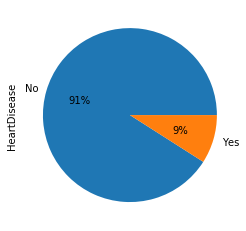

In [20]:
df['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

# target class is imbalanced only 9%

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [85]:
categorical_features=df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

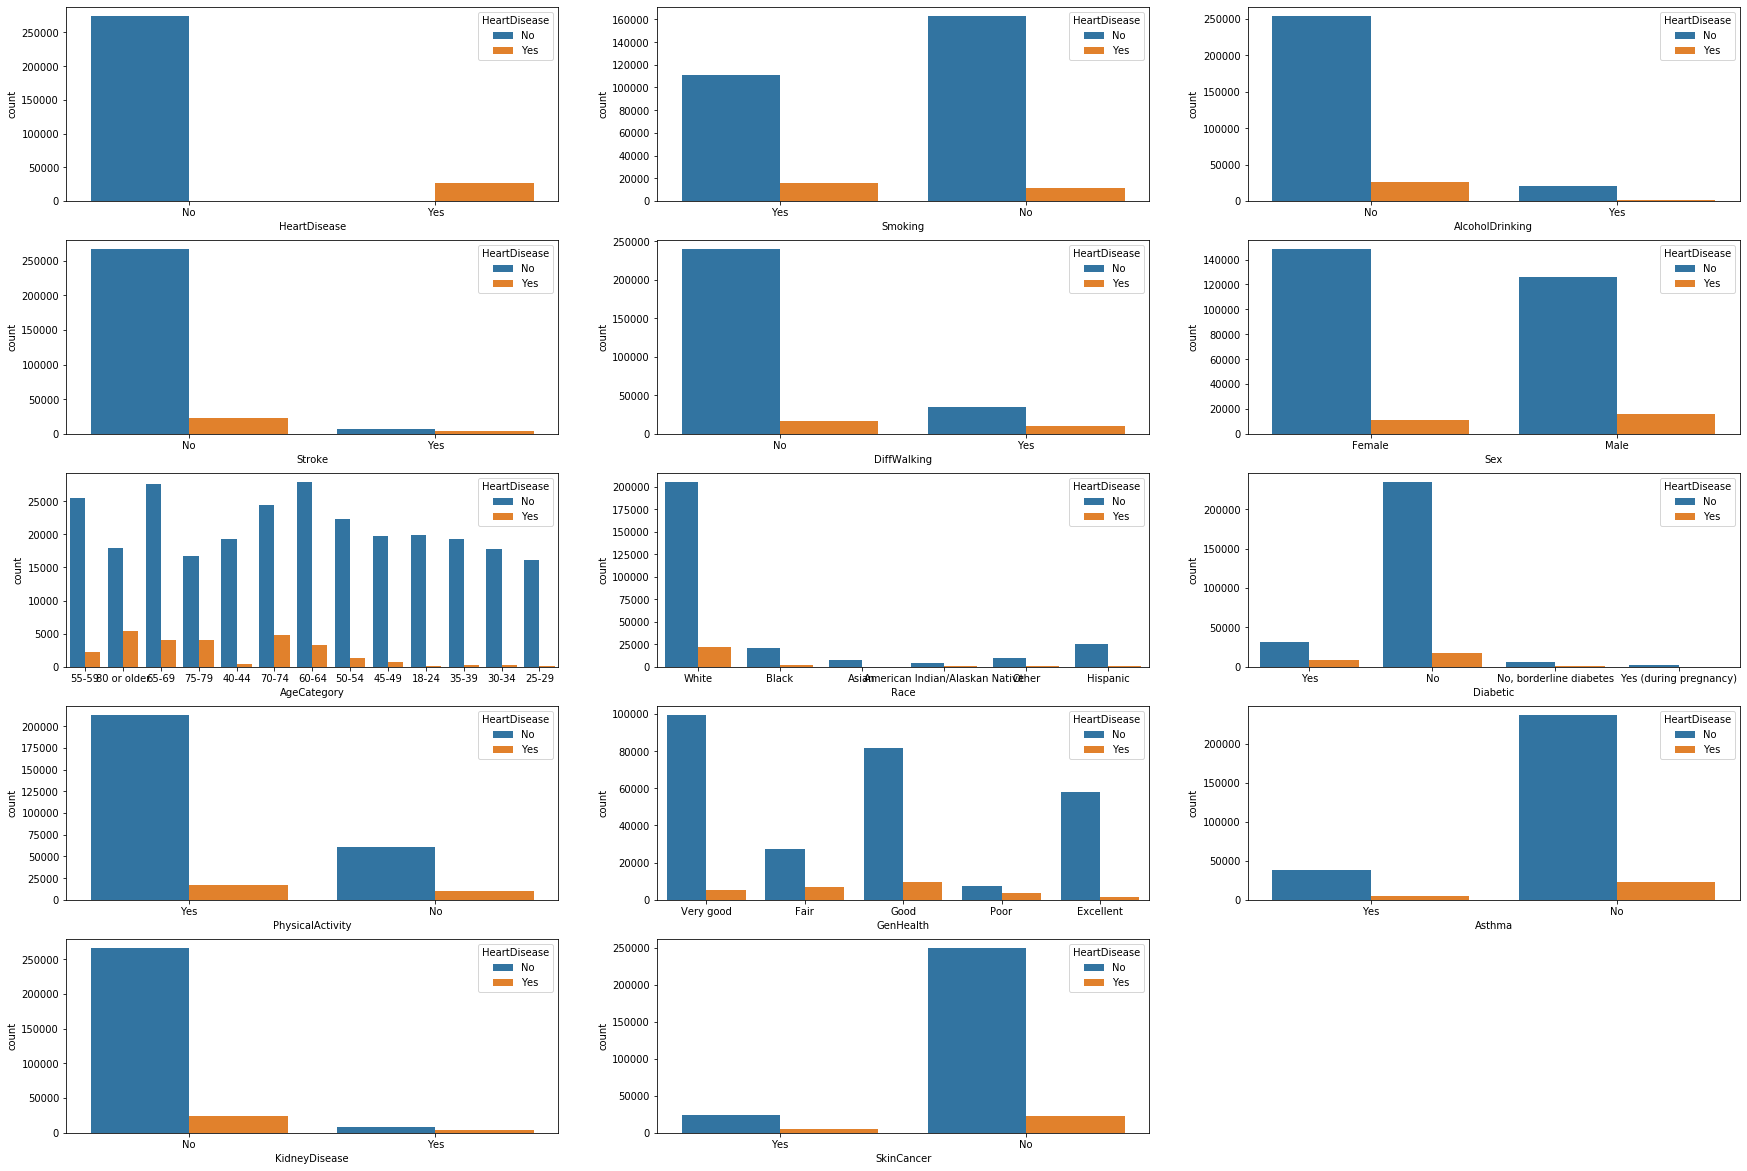

In [86]:
# number of people with heart disease wrt. various factors
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='HeartDisease',data=df)
    i+=1

## from the plots we observe:
## smokers have a high risk of heart diseases than non smokers
## people in the age group 7074 have higher risks of heart disease
## male are more prone to heart disease
## people who have difficulty in walking/climbing have greater chance of heart disease
## people who dont have kidney disease have more chances of heart disease, this could be spurious correlation though

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [87]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [88]:
df['Diabetic']=df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})

In [89]:
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [90]:
df['HeartDisease']=df['HeartDisease'].replace({'Yes':1,'No':0})

In [91]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [92]:
# select object datatype variables
object_type_variables=[i for i in df[['AgeCategory','Race','GenHealth']] if df.dtypes[i]== object]
le=LabelEncoder()
def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype('str'))
        df[i]=q
        df[i]=df[i].astype('int')
encoder(df)

In [93]:
df=pd.get_dummies(df,drop_first=True)
df.head(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,7,5,4,5.0,1,0,0,0,0,1,1,1,0,1
1,0,20.34,0.0,0.0,12,5,4,7.0,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,9,5,1,8.0,1,0,0,0,1,1,1,1,0,0
3,0,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,1
4,0,23.71,28.0,0.0,4,5,4,8.0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [94]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(241373, 17) (60344, 17)
(241373,) (60344,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [96]:
ss=StandardScaler()
X_train.iloc[:, (np.where((X_train.dtypes == np.int64) | 
                 (X_train.dtypes == np.float64)))[0]]=ss.fit_transform(X_train.iloc[:, (np.where((X_train.dtypes == np.int64) | 
                 (X_train.dtypes == np.float64)))[0]])
X_test.iloc[:, (np.where((X_test.dtypes == np.int64) | 
                 (X_test.dtypes == np.float64)))[0]]=ss.fit_transform(X_test.iloc[:, (np.where((X_test.dtypes == np.int64) | 
                 (X_test.dtypes == np.float64)))[0]])


In [97]:
X_train.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
120081,0.607562,-0.438984,-0.507143,-0.420710,0.513415,1.176653,-0.74035,0,0,0,0,1,1,1,0,0,0
310809,0.127566,-0.438984,1.334662,0.973989,0.513415,1.176653,-0.74035,1,0,0,0,0,0,1,0,0,0


In [98]:
X_test.head(2)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
268898,0.374167,3.244323,3.213412,0.414778,0.513855,-0.810075,-0.055199,0,0,0,1,0,0,0,0,0,0
49456,1.947885,-0.438177,-0.506720,-0.422623,0.513855,-0.147531,-0.734842,0,0,0,1,1,0,0,1,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [99]:
def fit_n_print(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [100]:
lr=LogisticRegression()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
gb=GradientBoostingClassifier()

estimators=[('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc=StackingClassifier(estimators=estimators, final_estimator=rf)


In [101]:
result=pd.DataFrame(columns=['Accuracy'])
for model,model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],['Logistic Regression','Naive Bayes','KNN','Decision tree','Random Forest','Ada Boost','Gradient Boost','Stacking']):
    result.loc[model_name]=fit_n_print(model,X_train,X_test,y_train,y_test)

In [102]:
result

,Accuracy
Logistic Regression,0.909817
Naive Bayes,0.842006
KNN,0.900686
Decision tree,0.853788
Random Forest,0.898913
Ada Boost,0.911060
Gradient Boost,0.910911
Stacking,0.905459


### Conclusion

## All these classifiers are observed to provide an accuracy of >84% in predicting the accuracy

## Adaboost performs best on the test data

----
## Happy Learning:)
----